In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [13]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\labs\\dmpa_project_final\\dmpa_1.csv")
data.head(5)

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight
0,3,1000,0.03,6.20,6200.0,240.117626,Pediatric,10mg/ml,358
1,15,31920,0.07,3.99,127360.8,240.117626,Adult,150mg,1855
2,16,38000,0.05,3.20,121600.0,240.117626,Adult,30mg,7590
3,23,416,0.02,5.35,2225.6,240.117626,Pediatric,10mg/ml,504
4,44,135,0.36,32.40,4374.0,240.117626,Pediatric,200mg,328


In [14]:
features = ['line_item_quantity', 'line_item_value']
X = data[features]

In [15]:
# used for scaling the values it is used to standardize and normalize
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# it is used to fit the values fit-mean and sd for x,transform-subtracts the mean and divide by sd


In [16]:
#n_neighbours-consider the nearest values for local density contamination is the proportion of data
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)

#this fits the lof model to x_scaled predict method predicts the features with -1
y_pred = lof.fit_predict(X_scaled)

is_anomaly = y_pred == -1


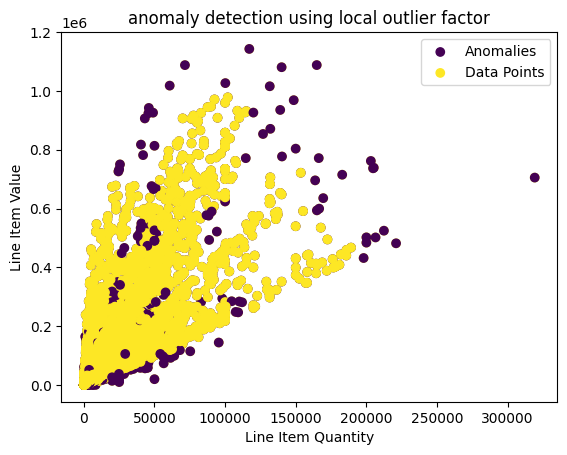

In [27]:
plt.scatter(X['line_item_quantity'], X['line_item_value'], c=is_anomaly, cmap='viridis', label='Anomalies')
plt.scatter(X['line_item_quantity'], X['line_item_value'], c=np.logical_not(is_anomaly), cmap='viridis', label='Data Points')
plt.xlabel('Line Item Quantity')
plt.ylabel('Line Item Value')
plt.title('anomaly detection using local outlier factor')
plt.legend(loc='upper right')
plt.show()


In [ ]:
anomalies = data[is_anomaly]
print("Anomalies:")
print(anomalies)

Anomalies:
      Unnamed: 0     id project code            pq #   po / so #  asn/dn #  \
16            30    161   117-ET-T01  Pre-PQ Process  SCMS-11070   ASN-916   
31            65    637   108-VN-T01  Pre-PQ Process  SCMS-26200  ASN-2563   
34            72    719   104-CI-T01  Pre-PQ Process  SCMS-29340  ASN-2921   
72           122   1179   108-VN-T01  Pre-PQ Process  SCMS-44990  ASN-4302   
82           138   1283   108-VN-T01  Pre-PQ Process    SCMS-170   ASN-273   
...          ...    ...          ...             ...         ...       ...   
7830       10284  86758   104-CI-T30       FPQ-14370    SO-49052   DN-4064   
7834       10289  86782   111-MZ-T30       FPQ-15195    SO-50121   DN-4153   
7854       10311  86809   114-UG-T30       FPQ-15294    SO-50070   DN-4259   
7860       10318  86817   103-ZW-T30       FPQ-15197    SO-50020   DN-4307   
7861       10319  86818   103-ZW-T30       FPQ-15197    SO-50020   DN-4307   

            country managed by  fulfill via vendor i

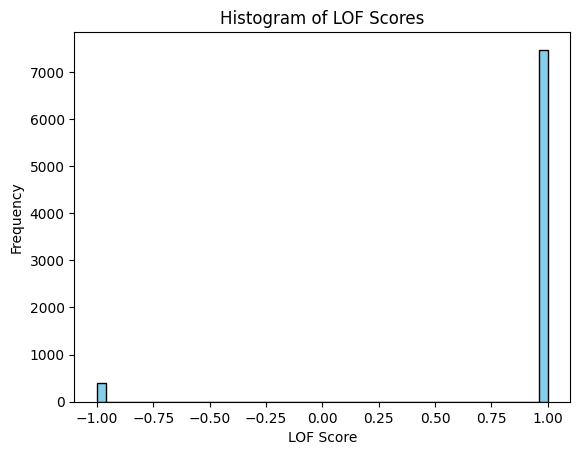

In [19]:

plt.hist(y_pred, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.title('Histogram of LOF Scores')
plt.show()

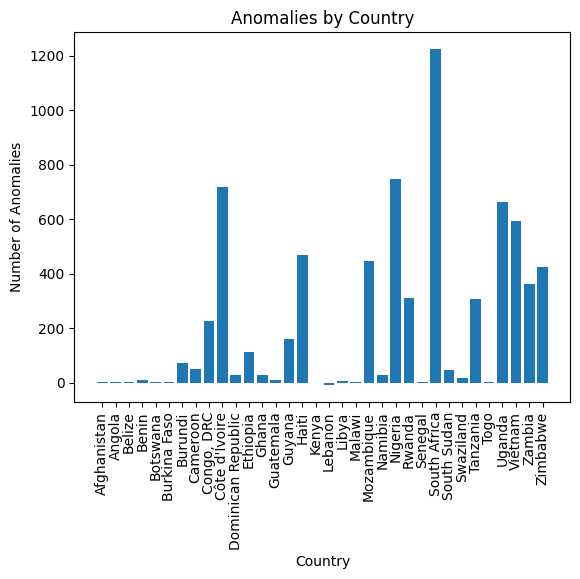

In [ ]:
data['Anomaly'] = y_pred  # Assuming y_pred contains anomaly labels
anomaly_counts = data.groupby('country')['Anomaly'].sum().reset_index()
plt.bar(anomaly_counts['country'], anomaly_counts['Anomaly'])
plt.xlabel('Country')
plt.ylabel('Number of Anomalies')
plt.title('Anomalies by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()


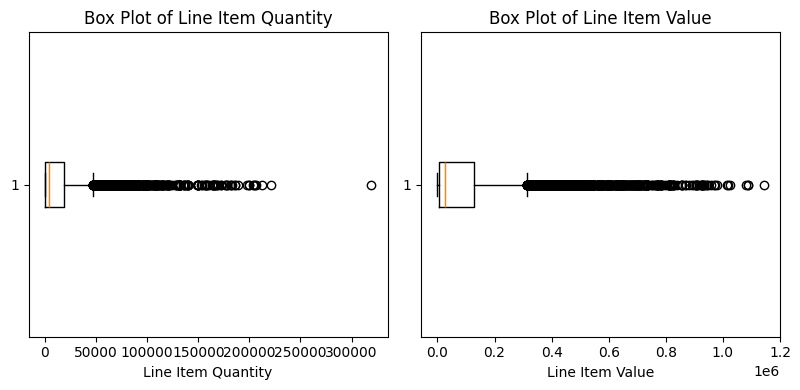

In [21]:
# import seaborn as sns
# sns.pairplot(data, hue='Anomaly', palette={-1: 'red', 1: 'blue'})
# plt.title('Pairwise Scatter Plot with Anomalies')
# plt.show()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(data['line_item_quantity'], vert=False)
plt.xlabel('Line Item Quantity')
plt.title('Box Plot of Line Item Quantity')

plt.subplot(1, 2, 2)
plt.boxplot(data['line_item_value'], vert=False)
plt.xlabel('Line Item Value')
plt.title('Box Plot of Line Item Value')

plt.tight_layout()
plt.show()



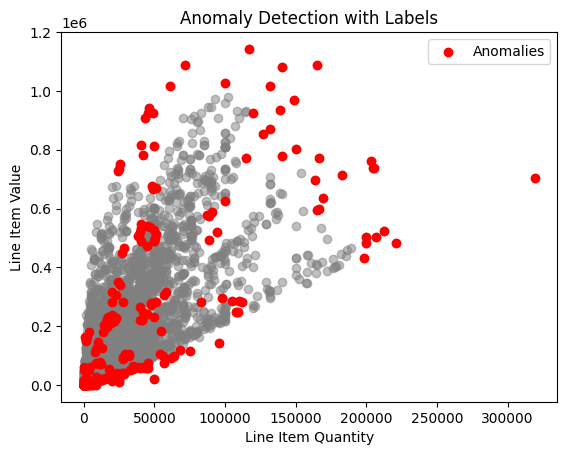

In [23]:
anomalies = data[is_anomaly]
plt.scatter(data['line_item_quantity'], data['line_item_value'], c='gray', alpha=0.5)
plt.scatter(anomalies['line_item_quantity'], anomalies['line_item_value'], c='red', label='Anomalies')
plt.xlabel('Line Item Quantity')
plt.ylabel('Line Item Value')
plt.title('Anomaly Detection with Labels')
plt.legend(loc='upper right')
plt.show()
